In [241]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [242]:
import torch 
import torchvision 
from torchvision.datasets import MNIST

In [243]:
dataset = MNIST(root='data/', download =False)

In [244]:
len(dataset)

60000

In [245]:
test_dataset = MNIST(root='data/', train=False)

In [246]:
len(test_dataset)

10000

In [247]:
 image,label = dataset[10]

3


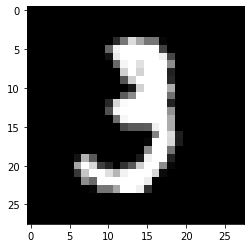

In [248]:
plt.imshow(image,cmap='gray')
print(label)

In [249]:
import torchvision.transforms as transforms

In [250]:
dataset = MNIST(root='data/',train= True,transform = transforms.ToTensor())

In [251]:
img_tensor, label = dataset[10]

In [252]:
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 3


In [253]:
import numpy as np
def split(n,val_pct):
    
    n_val = int(val_pct *n)
    
    indxs = np.random.permutation(n)
    
    return indxs[n_val:], indxs[:n_val]

In [254]:
train_indics , val_indics = split(len(dataset),val_pct = 0.2)

In [255]:
len(val_indics)

12000

In [256]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [257]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indics)
train_loader = DataLoader(dataset, batch_size, sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indics)
val_loader = DataLoader(dataset, batch_size, sampler=val_sampler)

In [258]:
import torch.nn as nn

input_size = 28*28
num_class = 10

model = nn.Linear(input_size,num_class)

In [259]:
print(model.bias.shape)

torch.Size([10])


In [260]:
model.weight

Parameter containing:
tensor([[ 0.0061, -0.0192, -0.0043,  ...,  0.0005,  0.0139, -0.0310],
        [-0.0059, -0.0036,  0.0129,  ...,  0.0087,  0.0096,  0.0210],
        [ 0.0262, -0.0306,  0.0038,  ..., -0.0305,  0.0300,  0.0079],
        ...,
        [ 0.0246,  0.0084, -0.0290,  ...,  0.0038,  0.0221, -0.0356],
        [ 0.0037, -0.0102,  0.0176,  ...,  0.0319, -0.0306,  0.0035],
        [ 0.0331,  0.0031,  0.0093,  ..., -0.0270,  0.0306, -0.0135]],
       requires_grad=True)

In [261]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.0061, -0.0192, -0.0043,  ...,  0.0005,  0.0139, -0.0310],
         [-0.0059, -0.0036,  0.0129,  ...,  0.0087,  0.0096,  0.0210],
         [ 0.0262, -0.0306,  0.0038,  ..., -0.0305,  0.0300,  0.0079],
         ...,
         [ 0.0246,  0.0084, -0.0290,  ...,  0.0038,  0.0221, -0.0356],
         [ 0.0037, -0.0102,  0.0176,  ...,  0.0319, -0.0306,  0.0035],
         [ 0.0331,  0.0031,  0.0093,  ..., -0.0270,  0.0306, -0.0135]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0037, -0.0134,  0.0015,  0.0307, -0.0106,  0.0125,  0.0270, -0.0182,
          0.0207, -0.0147], requires_grad=True)]

In [262]:
for images,labels in train_loader:
    
    print(labels)
    print(images.shape)
    outputs = model(images)
    break

tensor([4, 9, 8, 7, 6, 8, 9, 2, 9, 9, 0, 6, 0, 3, 6, 9, 4, 7, 5, 1, 3, 9, 2, 3,
        6, 9, 0, 3, 9, 1, 4, 7, 4, 9, 1, 3, 7, 8, 2, 2, 1, 2, 5, 8, 5, 6, 1, 3,
        2, 4, 1, 5, 2, 7, 0, 0, 3, 5, 5, 6, 6, 7, 2, 7, 4, 8, 4, 7, 0, 5, 3, 7,
        3, 7, 5, 0, 5, 5, 8, 1, 1, 5, 5, 8, 7, 8, 9, 6, 1, 7, 7, 5, 8, 8, 4, 6,
        8, 2, 3, 0])
torch.Size([100, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (2800x28 and 784x10)

In [263]:
class MinstModel(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.linear= nn.Linear(input_size,num_class)
        
    def forward(self,xb):
        
        xb= xb.reshape(-1,784)
        out = self.linear(xb)
        return out
    
model = MinstModel()

In [264]:
print(model.linear.weight.shape)

torch.Size([10, 784])


In [265]:
list(model.parameters())

[Parameter containing:
 tensor([[ 2.0172e-02,  2.6524e-02, -2.2514e-02,  ..., -1.8131e-02,
          -1.2181e-02, -3.3549e-02],
         [ 6.4409e-03,  8.6560e-03, -2.1599e-05,  ..., -1.5993e-02,
           2.5617e-02, -3.4892e-02],
         [-1.0871e-02,  3.3088e-02, -2.7079e-02,  ...,  3.9537e-03,
          -9.7031e-03,  1.8536e-03],
         ...,
         [-3.5478e-02,  3.0814e-02, -6.8295e-03,  ...,  7.3560e-03,
           3.0547e-02, -3.2367e-02],
         [-9.6961e-03, -3.2379e-02, -2.7888e-02,  ...,  4.8913e-03,
          -3.5243e-02,  1.1283e-02],
         [-4.1907e-03,  3.5411e-02, -1.5161e-02,  ..., -1.7619e-02,
           6.5771e-03,  1.1695e-02]], requires_grad=True),
 Parameter containing:
 tensor([ 0.0153,  0.0079, -0.0116,  0.0207,  0.0323,  0.0059,  0.0169, -0.0017,
         -0.0310,  0.0035], requires_grad=True)]

In [266]:
for images,labels in train_loader:
    
    outputs = model(images)
    
    break
    
    

In [267]:
print(outputs.shape)

torch.Size([100, 10])


In [268]:
outputs[:2].data

tensor([[ 0.0118, -0.0647, -0.1010, -0.0222,  0.5114,  0.3320, -0.1123,  0.0475,
          0.1765, -0.3266],
        [-0.3049,  0.2880,  0.0607, -0.1807,  0.3005,  0.2058,  0.1377, -0.1400,
          0.1903, -0.1846]])

In [269]:
import torch.nn.functional as F

In [270]:
probs = F.softmax(outputs,dim= 1)
print('Sample Probabilities : \n ', probs[:2].data)

print('Sum:',torch.sum(probs[0]).item())

Sample Probabilities : 
  tensor([[0.0941, 0.0872, 0.0841, 0.0910, 0.1551, 0.1297, 0.0831, 0.0976, 0.1110,
         0.0671],
        [0.0695, 0.1258, 0.1002, 0.0787, 0.1273, 0.1158, 0.1082, 0.0820, 0.1141,
         0.0784]])
Sum: 1.0


In [271]:
max_probs, preds = torch.max(probs, dim=1)
print(max_probs)
print(preds)

tensor([0.1551, 0.1273, 0.1224, 0.1194, 0.1215, 0.1393, 0.1355, 0.1209, 0.1173,
        0.1910, 0.1330, 0.1316, 0.1217, 0.1311, 0.1531, 0.1217, 0.1241, 0.1356,
        0.1078, 0.1187, 0.1335, 0.1282, 0.1251, 0.1196, 0.1237, 0.1349, 0.1265,
        0.1282, 0.1234, 0.1206, 0.1161, 0.1195, 0.1292, 0.1473, 0.1325, 0.1448,
        0.1211, 0.1583, 0.1178, 0.1560, 0.1370, 0.1397, 0.1298, 0.1125, 0.1316,
        0.1297, 0.1341, 0.1256, 0.1399, 0.1288, 0.1423, 0.1290, 0.1296, 0.1285,
        0.1217, 0.1267, 0.1516, 0.1381, 0.1290, 0.1224, 0.1270, 0.1535, 0.1214,
        0.1235, 0.1303, 0.1565, 0.1180, 0.1260, 0.1259, 0.1754, 0.1473, 0.1176,
        0.1348, 0.1486, 0.1148, 0.1175, 0.1235, 0.1369, 0.1549, 0.1211, 0.1291,
        0.1134, 0.1182, 0.1419, 0.1209, 0.1178, 0.1248, 0.1479, 0.1277, 0.1259,
        0.1304, 0.1315, 0.1332, 0.1168, 0.1243, 0.1339, 0.1247, 0.1168, 0.1341,
        0.1261], grad_fn=<MaxBackward0>)
tensor([4, 4, 4, 5, 1, 0, 4, 4, 4, 4, 4, 0, 1, 1, 4, 4, 8, 0, 1, 4, 2, 1, 1, 4,

In [272]:
labels

tensor([2, 1, 3, 2, 5, 2, 2, 4, 4, 2, 3, 0, 1, 5, 0, 6, 9, 0, 1, 8, 2, 2, 1, 9,
        4, 1, 9, 4, 4, 3, 0, 4, 4, 0, 1, 8, 9, 3, 8, 7, 1, 7, 7, 1, 0, 3, 7, 2,
        6, 1, 8, 4, 7, 4, 7, 7, 6, 6, 8, 1, 9, 6, 8, 2, 8, 8, 7, 9, 7, 2, 8, 7,
        0, 3, 5, 4, 1, 3, 2, 5, 3, 4, 7, 5, 7, 0, 6, 2, 9, 6, 3, 4, 3, 5, 3, 6,
        3, 4, 9, 9])

In [273]:
def accuracy(l1,l2):
    
    return torch.sum(l1==l2).item()/len(l1)

In [274]:
accuracy(preds,labels)

0.2

In [275]:
loss_fn = F.cross_entropy

In [276]:
loss = loss_fn(outputs,labels)
print(loss)

tensor(2.3307, grad_fn=<NllLossBackward>)


In [277]:
learning_rate= 0.001
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)

In [278]:
def loss_batch(model,loss_func, xb,yb, opt= None,metric = None):
    
    preds = model(xb)
    loss = loss_func(preds,yb)
    
    
    if opt is not None:
        
        loss.backward()
        
        opt.step()
        
        opt.zero_grad()
        
    metric_result = None
    
    if metric is not None:
        
        metric_result = metric(preds,yb)
        
        
    return loss.item(), len(xb), metric_result

In [282]:
def evaluate (model, loss_fn, valid_dl, metric = None):
    
    with torch.no_grad():
        
        results = [loss_batch(model, loss_fn,xb, yb, metric = metric) for xb,yb in valid_dl]
        
        
        losses, nums, metrics = zip(*results)
        
        
        total = np.sum(nums)
        
        avg_loss = np.sum(np.multiply(losses,nums))/ total
        
        avg_metric = None
        
        if metric is not None:
            
            avg_metric = np.sum(np.multiply(metrics, nums ))/ total
            
    return avg_loss, total, avg_metric

In [283]:
def accuracy(outputs, labels):
    
    _,preds = torch.max(outputs, dim=1)
    
    return torch.sum(preds==labels).item()/len(preds)

In [284]:
val_loss, total, val_acc = evaluate(model, loss_fn,val_loader,metric= accuracy)

print('Loss: {:.4f}, Accuracy : {:.4f}'.format(val_loss,val_acc))

Loss: 2.3508, Accuracy : 0.1168


In [296]:
def fit(epochs, model,loss_fn,opt,train_dl,valid_dl,metric = None):
    
    for epoch in range(epochs):
        
        for xb,yb in train_dl:
            
            loss,_,_ = loss_batch(model,loss_fn,xb,yb,opt)
            
        result = evaluate(model,loss_fn,valid_dl,metric)
        val_, total, val_metric = result
        
        if metric is None:
            
            print('Epoch [{}/{}],Loss:{:.4f}'.format(epoch+1,epochs,val_loss))
            
        else:
            
            print('Epoch [{}/{}],Loss:{:.4f},{}: {:.4f}'.format(epoch+1,epochs,val_loss,metric.__name__,val_metric))

model

In [297]:
model = MinstModel()
optimizer = torch.optim.SGD(model.parameters(), lr= learning_rate)

In [298]:
fit(5,model,F.cross_entropy,optimizer,train_loader, val_loader,accuracy)

Epoch [1/5],Loss:2.3508,accuracy: 0.6536
Epoch [2/5],Loss:2.3508,accuracy: 0.7501
Epoch [3/5],Loss:2.3508,accuracy: 0.7842
Epoch [4/5],Loss:2.3508,accuracy: 0.7995
Epoch [5/5],Loss:2.3508,accuracy: 0.8117


In [299]:
fit(5,model,F.cross_entropy,optimizer,train_loader, val_loader,accuracy)

Epoch [1/5],Loss:2.3508,accuracy: 0.8193
Epoch [2/5],Loss:2.3508,accuracy: 0.8259
Epoch [3/5],Loss:2.3508,accuracy: 0.8299
Epoch [4/5],Loss:2.3508,accuracy: 0.8340
Epoch [5/5],Loss:2.3508,accuracy: 0.8381


In [300]:
fit(5,model,F.cross_entropy,optimizer,train_loader, val_loader,accuracy)

Epoch [1/5],Loss:2.3508,accuracy: 0.8418
Epoch [2/5],Loss:2.3508,accuracy: 0.8455
Epoch [3/5],Loss:2.3508,accuracy: 0.8483
Epoch [4/5],Loss:2.3508,accuracy: 0.8499
Epoch [5/5],Loss:2.3508,accuracy: 0.8522


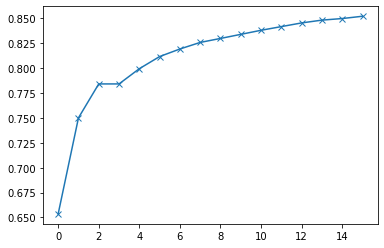

In [303]:
accuracies = [0.6536,.7501,.7842,.7842,.7995,.8117,.8193,.8259,.8299,.8340,.8381,.8418,.8455,.8483,.8499,.8522]
plt.plot(accuracies,'-x')


Testing with inndividual Images

In [305]:
test_dataset = MNIST(root='data/',train=False, transform = transforms.ToTensor())

Shape torch.Size([1, 28, 28])
label 7


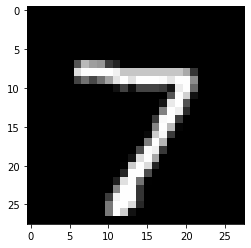

In [306]:
img, label = test_dataset[0]
plt.imshow(img[0],cmap='gray')
print('Shape', img.shape)
print('label', label)

In [307]:
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [308]:
def predict_image(img,label):
    xb = img.unsqueeze(0)
    
    yb = model(xb)
    
    _,preds = torch.max(yb, dim=1)
    return preds[0].item()

label : 9 , Predicted : 7


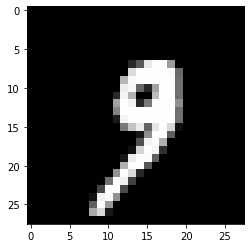

In [309]:
img, label = test_dataset[1000]
plt.imshow(img[0],cmap='gray')
print('label :', label,', Predicted :',predict_image(img,model))

In [310]:
test_loader = DataLoader(test_dataset, batch_size = 200)

test_loss,total, test_acc = evaluate(model,loss_fn,test_loader, metric = accuracy)
print('Loss :{:.4f}, accuracy: {:.4f}'.format(test_loss,test_acc))

Loss :0.6659, accuracy: 0.8606


# Saving and Load Model

In [311]:
torch.save(model.state_dict(), 'minst_logistic.pth')

In [312]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[-3.4863e-02, -2.9637e-03,  5.0653e-03,  ...,  3.1042e-02,
                       -2.8909e-02, -1.0264e-02],
                      [ 1.3737e-03, -2.0383e-03, -1.5564e-02,  ...,  2.6794e-02,
                       -1.4217e-02, -2.5794e-02],
                      [-2.4398e-02, -3.2709e-02,  1.7626e-03,  ...,  2.4153e-02,
                        2.9140e-02,  7.8681e-03],
                      ...,
                      [ 3.2664e-03,  2.4436e-02, -9.4693e-03,  ..., -9.2267e-03,
                       -1.3564e-02,  3.4407e-02],
                      [ 1.0348e-02,  6.8460e-03,  2.7656e-02,  ...,  2.4367e-02,
                       -2.4434e-02,  2.4465e-02],
                      [-2.6956e-02,  1.4213e-02,  1.6719e-02,  ..., -1.3307e-02,
                        3.3620e-02, -6.5606e-05]])),
             ('linear.bias',
              tensor([-0.0155,  0.0612, -0.0037,  0.0050, -0.0094,  0.0431, -0.0159,  0.0294,
                      -0.0765,

In [315]:
model2 = MinstModel()
model2.load_state_dict(torch.load('minst_logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-3.4863e-02, -2.9637e-03,  5.0653e-03,  ...,  3.1042e-02,
                       -2.8909e-02, -1.0264e-02],
                      [ 1.3737e-03, -2.0383e-03, -1.5564e-02,  ...,  2.6794e-02,
                       -1.4217e-02, -2.5794e-02],
                      [-2.4398e-02, -3.2709e-02,  1.7626e-03,  ...,  2.4153e-02,
                        2.9140e-02,  7.8681e-03],
                      ...,
                      [ 3.2664e-03,  2.4436e-02, -9.4693e-03,  ..., -9.2267e-03,
                       -1.3564e-02,  3.4407e-02],
                      [ 1.0348e-02,  6.8460e-03,  2.7656e-02,  ...,  2.4367e-02,
                       -2.4434e-02,  2.4465e-02],
                      [-2.6956e-02,  1.4213e-02,  1.6719e-02,  ..., -1.3307e-02,
                        3.3620e-02, -6.5606e-05]])),
             ('linear.bias',
              tensor([-0.0155,  0.0612, -0.0037,  0.0050, -0.0094,  0.0431, -0.0159,  0.0294,
                      -0.0765,

In [316]:
test_loss, total, test_acc = evaluate(model2, loss_fn,test_loader, metric= accuracy)
print('Loss :{:.4f}, accuracy: {:.4f}'.format(test_loss,test_acc))


Loss :0.6659, accuracy: 0.8606
